# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [62]:
# %pip install --upgrade plotly

## Import Statements

In [63]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [64]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [65]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [66]:
print("Median_Household_Income_2015.csv")
# Check the shape of the dataset
print("Shape of the dataset:", df_hh_income.shape)

# Check the number of columns and rows
num_columns = len(df_hh_income.columns)
num_rows = len(df_hh_income)
print("Number of columns:", num_columns)
print("Number of rows:", num_rows)

# Check the column names
column_names = df_hh_income.columns.tolist()
print("Column names:", column_names)

# Check for NaN values
print("Number of NaN values:\n", df_hh_income.isnull().sum())

# Check for duplicates
num_duplicates = df_hh_income.duplicated().sum()
print("Number of duplicates:", num_duplicates)


Median_Household_Income_2015.csv
Shape of the dataset: (29322, 3)
Number of columns: 3
Number of rows: 29322
Column names: ['Geographic Area', 'City', 'Median Income']
Number of NaN values:
 Geographic Area     0
City                0
Median Income      51
dtype: int64
Number of duplicates: 0


In [67]:
print("Pct_People_Below_Poverty_Level.csv")
print("Shape of the dataset:", df_pct_poverty.shape)

num_columns = len(df_pct_poverty.columns)
num_rows = len(df_pct_poverty)
print("Number of columns:", num_columns)
print("Number of rows:", num_rows)

column_names = df_pct_poverty.columns.tolist()
print("Column names:", column_names)

print("Number of NaN values:\n", df_pct_poverty.isnull().sum())

num_duplicates = df_pct_poverty.duplicated().sum()
print("Number of duplicates:", num_duplicates)

Pct_People_Below_Poverty_Level.csv
Shape of the dataset: (29329, 3)
Number of columns: 3
Number of rows: 29329
Column names: ['Geographic Area', 'City', 'poverty_rate']
Number of NaN values:
 Geographic Area    0
City               0
poverty_rate       0
dtype: int64
Number of duplicates: 0


In [68]:
print("Pct_Over_25_Completed_High_School.csv")
print("Shape of the dataset:", df_pct_completed_hs.shape)

num_columns = len(df_pct_completed_hs.columns)
num_rows = len(df_pct_completed_hs)
print("Number of columns:", num_columns)
print("Number of rows:", num_rows)

column_names = df_pct_completed_hs.columns.tolist()
print("Column names:", column_names)

print("Number of NaN values:\n", df_pct_completed_hs.isnull().sum())

num_duplicates = df_pct_completed_hs.duplicated().sum()
print("Number of duplicates:", num_duplicates)

Pct_Over_25_Completed_High_School.csv
Shape of the dataset: (29329, 3)
Number of columns: 3
Number of rows: 29329
Column names: ['Geographic Area', 'City', 'percent_completed_hs']
Number of NaN values:
 Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64
Number of duplicates: 0


In [69]:
print("Share_of_Race_By_City.csv")
print("Shape of the dataset:", df_fatalities.shape)

num_columns = len(df_fatalities.columns)
num_rows = len(df_fatalities)
print("Number of columns:", num_columns)
print("Number of rows:", num_rows)

column_names = df_fatalities.columns.tolist()
print("Column names:", column_names)

print("Number of NaN values:\n", df_fatalities.isnull().sum())

num_duplicates = df_fatalities.duplicated().sum()
print("Number of duplicates:", num_duplicates)

Share_of_Race_By_City.csv
Shape of the dataset: (2535, 14)
Number of columns: 14
Number of rows: 2535
Column names: ['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender', 'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level', 'flee', 'body_camera']
Number of NaN values:
 id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64
Number of duplicates: 0


In [70]:
print("Deaths_by_Police_US.csv")
print("Shape of the dataset:", df_share_race_city.shape)

num_columns = len(df_share_race_city.columns)
num_rows = len(df_share_race_city)
print("Number of columns:", num_columns)
print("Number of rows:", num_rows)

column_names = df_share_race_city.columns.tolist()
print("Column names:", column_names)

print("Number of NaN values:\n", df_share_race_city.isnull().sum())

num_duplicates = df_share_race_city.duplicated().sum()
print("Number of duplicates:", num_duplicates)

Deaths_by_Police_US.csv
Shape of the dataset: (29268, 7)
Number of columns: 7
Number of rows: 29268
Column names: ['Geographic area', 'City', 'share_white', 'share_black', 'share_native_american', 'share_asian', 'share_hispanic']
Number of NaN values:
 Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64
Number of duplicates: 0


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [72]:
import re

# Check the number of non-numerical values in the 'Median Income' column
non_numerical_mask = df_hh_income['Median Income'].apply(lambda x: bool(re.search(r'\D', str(x))))
num_non_numerical = non_numerical_mask.sum()
print("Number of non-numerical values in 'Median Income' column:", num_non_numerical)

# Extract digits from the non-numerical values
df_hh_income['Median Income'] = df_hh_income['Median Income'].apply(lambda x: re.sub(r'\D', '', str(x)) if bool(re.search(r'\D', str(x))) else x)

# Convert the 'Median Income' column to numeric
df_hh_income['Median Income'] = pd.to_numeric(df_hh_income['Median Income'], errors='coerce')

# Verify the presence of non-numerical values and NaN after extraction
num_non_numerical_after_extraction = df_hh_income['Median Income'].isnull().sum()
print("Number of non-numerical values after extraction:", num_non_numerical_after_extraction)


Number of non-numerical values in 'Median Income' column: 29322
Number of non-numerical values after extraction: 1904


In [78]:
mean_median_income = df_hh_income['Median Income'].mean()

# Fill NaN values with the mean median income
df_hh_income['Median Income'].fillna(mean_median_income, inplace=True)

# Verify if the NaN values have been filled and replaced
num_nan_after_imputation = df_hh_income['Median Income'].isnull().sum()
print("Number of NaN values after imputation:", num_nan_after_imputation)

Number of NaN values after imputation: 0


# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [80]:
# Extract relevant columns (State, Median Income)
df = df_hh_income[['Geographic Area', 'Median Income']]
# Sort the DataFrame by Median Income in descending order
df.sort_values(by='Median Income', ascending=False, inplace=True)

/var/folders/q8/y9bny_fn6kv6dv_n4j6zzs580000gn/T/ipykernel_89441/1319768049.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by='Median Income', ascending=False, inplace=True)


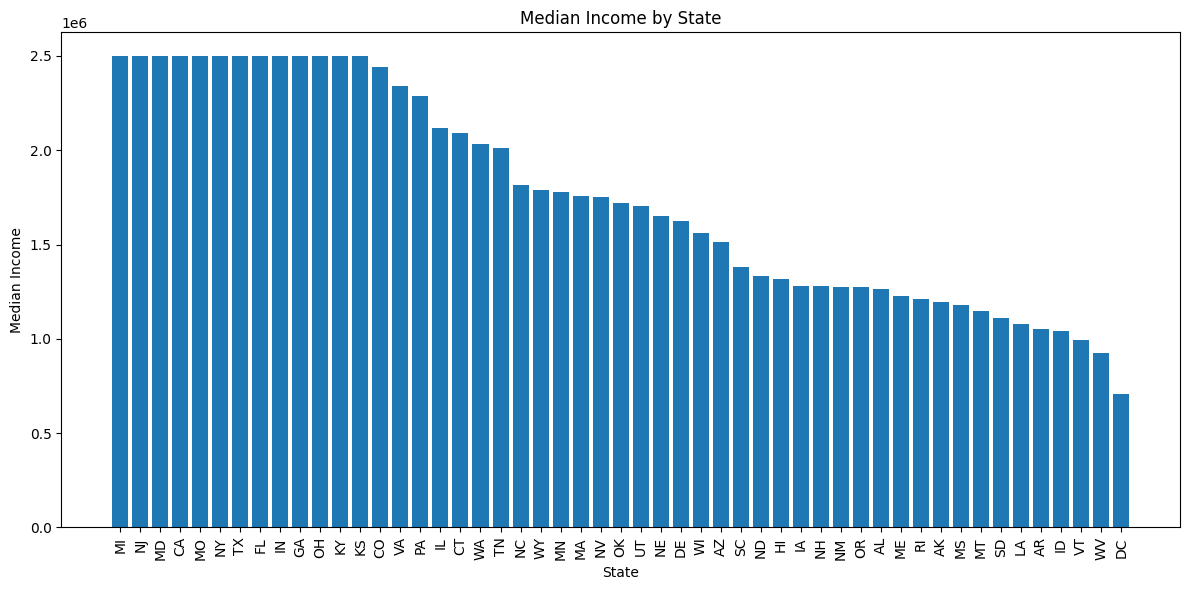

In [81]:
# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(df['Geographic Area'], df['Median Income'])
plt.xticks(rotation='vertical')
plt.xlabel('State')
plt.ylabel('Median Income')
plt.title('Median Income by State')
plt.tight_layout()
plt.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).